In [239]:
# import pandas as pd
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier, plot_importance
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.feature_selection import SelectFromModel

# Set up Train and Test dataset

In [223]:
df = pd.read_csv('df_all.csv')

In [224]:
df.head()

,Player,Season,Pos,Pos2,Age,Conf,Tm,G,GS,MP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ALL_STAR
0,Quincy Acy,2015-16,PF,F,25,West,SAC,59,29,14.8,...,1.1,2.1,3.2,0.5,0.5,0.4,0.5,1.7,5.2,0
1,Jordan Adams,2015-16,SG,G,21,West,MEM,2,0,7.5,...,0.0,1.0,1.0,1.5,1.5,0.0,1.0,1.0,3.5,0
2,Steven Adams,2015-16,C,F,22,West,OKC,80,80,25.2,...,2.7,3.9,6.7,0.8,0.5,1.1,1.1,2.8,8.0,0
3,Arron Afflalo,2015-16,SG,G,30,East,NYK,71,57,33.4,...,0.3,3.4,3.7,2.0,0.4,0.1,1.2,2.0,12.8,0
4,Alexis Ajinça,2015-16,C,F,27,West,NOP,59,17,14.6,...,1.3,3.3,4.6,0.5,0.3,0.6,0.9,2.3,6.0,0


In [225]:
df_train = df.loc[(df['Season'] == '2015-16') | (df['Season'] == '2016-17') | (df['Season'] == '2017-18')]

In [226]:
#train, test, eval
df_train = df.loc[(df['Season'] == '2015-16') | (df['Season'] == '2016-17') | (df['Season'] == '2017-18')]
df_test = df.loc[(df['Season'] == '2018-19')]

In [227]:
X_train =  df_train[['G', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS']]

Y_train = df_train['ALL_STAR']

In [228]:
X_test = df_test[['G', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS']]

Y_test = df_test['ALL_STAR']

[0.008191467, 0.009128914, 0.010766148, 0.01078612, 0.014057136, 0.015886297, 0.015938696, 0.017942734, 0.018728904, 0.018750323, 0.021461375, 0.02636927, 0.028125998, 0.030151183, 0.03044186, 0.032928694, 0.03506882, 0.035697702, 0.0377078, 0.047741797, 0.04955715, 0.05438416, 0.056486465, 0.069588915, 0.30411205]


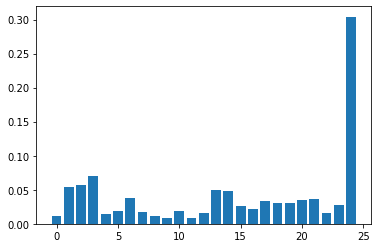

In [229]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, Y_train)

# feature importance
print(sorted(model.feature_importances_))

# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()


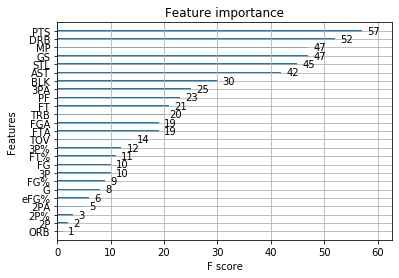

In [230]:
plot_importance(model)
pyplot.show()

#to my surprise that DRB is considered a important trait for an All Star

In [231]:
#fit model 
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [232]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test, predictions, normalize=True)

thresholds = sort(model.feature_importances_)

In [233]:
#this is not a good measure of our model
accuracy

0.9830508474576272

In [234]:
df_test['y_pred'] = predictions

C:\Users\leo.tsang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [243]:
df_pred = df_test.loc[(df_test['y_pred'] == 1) | (df_test['ALL_STAR'] == 1)]
df_pred

,Player,Season,Pos,Pos2,Age,Conf,Tm,G,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ALL_STAR,y_pred
1844,LaMarcus Aldridge,2018-19,C,F,33,West,SAS,81,81,33.2,...,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3,1,1
1856,Giannis Antetokounmpo,2018-19,PF,F,24,East,MIL,72,72,32.8,...,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,1,1
1884,Bradley Beal,2018-19,SG,G,25,East,WAS,82,82,36.9,...,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6,1,1
1939,Jimmy Butler,2018-19,SF-SG,F,29,West,TOT,65,65,33.6,...,3.4,5.3,4.0,1.9,0.6,1.5,1.7,18.7,0,1
1996,Stephen Curry,2018-19,PG,F,30,West,GSW,69,69,33.8,...,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3,1,1
1998,Anthony Davis,2018-19,C,F,25,West,NOP,56,56,33.0,...,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9,1,1
2011,DeMar DeRozan,2018-19,SG,G,29,West,SAS,77,77,34.9,...,5.3,6.0,6.2,1.1,0.5,2.6,2.3,21.2,0,1
2018,Luka Dončić,2018-19,SG,G,19,West,DAL,72,72,32.2,...,6.6,7.8,6.0,1.1,0.3,3.4,1.9,21.2,0,1
2025,Andre Drummond,2018-19,C,F,25,East,DET,79,79,33.5,...,10.2,15.6,1.4,1.7,1.7,2.2,3.4,17.3,0,1
2028,Kevin Durant,2018-19,SF,F,30,West,GSW,78,78,34.6,...,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0,1,1


In [241]:
Recall = recall_score(Y_test, predictions)
Precision = precision_score(Y_test, predictions)

Recall, Precision

(0.8461538461538461, 0.7333333333333333)

In [245]:
df_pred[['Player','ALL_STAR','y_pred']]

,Player,ALL_STAR,y_pred
1844,LaMarcus Aldridge,1,1
1856,Giannis Antetokounmpo,1,1
1884,Bradley Beal,1,1
1939,Jimmy Butler,0,1
1996,Stephen Curry,1,1
1998,Anthony Davis,1,1
2011,DeMar DeRozan,0,1
2018,Luka Dončić,0,1
2025,Andre Drummond,0,1
2028,Kevin Durant,1,1


# Predicting the 2019/20 All Stars

In [249]:
df_eval = df.loc[(df['Season'] == '2019-20')]
eval_X = df_eval[['G', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS']]

In [252]:
eval_pred = model.predict(eval_X)
eval_predictions = [round(value) for value in eval_pred]

In [258]:
df_eval['y_pred'] = eval_predictions

C:\Users\leo.tsang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [262]:
df_eval = df_eval.loc[(df_eval['y_pred'] == 1)]
df_eval

,Player,Season,Pos,Pos2,Age,Conf,Tm,G,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ALL_STAR,y_pred
2555,Giannis Antetokounmpo,2019-20,PF,F,25,East,MIL,26,26,31.1,...,10.2,12.8,5.3,1.3,1.2,3.7,3.2,31.0,0,1
2656,Anthony Davis,2019-20,PF,F,26,West,LAL,26,26,34.7,...,6.9,9.3,3.3,1.5,2.6,2.3,2.4,27.4,0,1
2667,Luka Dončić,2019-20,PG,F,20,West,DAL,25,25,32.2,...,8.3,9.6,8.9,1.2,0.1,4.4,2.3,29.3,0,1
2702,Paul George,2019-20,SF,F,29,West,LAC,17,17,30.6,...,5.6,6.1,3.9,1.5,0.4,3.6,2.6,24.8,0,1
2724,James Harden,2019-20,SG,G,30,West,HOU,26,26,37.8,...,4.9,5.9,7.5,2.0,0.7,5.0,3.3,39.3,0,1
2772,LeBron James,2019-20,PG,F,35,West,LAL,27,27,34.7,...,6.3,7.3,10.7,1.3,0.6,4.0,1.7,26.1,0,1
2807,Zach LaVine,2019-20,SG,G,24,East,CHI,28,28,32.7,...,3.7,4.5,3.9,1.3,0.5,3.3,2.4,22.6,0,1
2813,Kawhi Leonard,2019-20,SF,F,28,West,LAC,20,20,31.5,...,6.8,7.9,5.1,1.8,0.7,3.6,2.1,25.8,0,1
2981,Kemba Walker,2019-20,PG,F,29,East,BOS,23,23,32.3,...,3.3,4.2,5.3,1.0,0.6,2.1,1.7,23.1,0,1
2991,Russell Westbrook,2019-20,PG,F,31,West,HOU,23,23,34.5,...,6.4,8.0,7.3,1.7,0.3,4.3,3.9,22.5,0,1


In [ ]:
#our model only predicted 11, I believe it's because the GP and GS is affecting those numbers since F-Score of 
#are rated quite high so let's redo the model without the GP/GS and see whether it changes the outcome of the eval
